# "2020 Bilibili 百大UP主" 数据分析与可视化
姓名：杨馥冰    学号：1930713****          学院：计算机科学技术


【摘要】近年来，网络视频行业的用户规模一直呈增长趋势，Bilibili 为其中发展最迅猛的一个。为了表彰贡献突出的视频 UP 主，Bilibili 专门颁发了“百大 UP 主名单”作为最高荣誉，也是站内顶流的象征。这些 UP 主的数据中浓缩了B站大量用户的活动记录，存在着极高的信息浓度。我们尝试了多种可视化方法，在B站百大UP主数据分析中进行尝试性探索，选择了适合的方法对数据进行可视化展示，并结合多个属性进行分析，从中得到了有价值的结论。

# 1.引言
哔哩哔哩 Bilibili 是目前国内年轻世代高度聚集的文化社区和视频平台，被粉丝亲切地称作“B站”。从早期的ACG（动画、漫画、游戏）内容创作与分享的视频网站，经过十年多的发展，B站围绕用户、创作者和内容，构建了一个源源不断产生优质内容的生态系统，如今已经涵盖7000多个兴趣圈层的多元文化社区。

根据《中国互联网发展统计报告》[ http://www.gov.cn/xinwen/2020-04/28/content_5506903.htm]，截至2020年3月，我国网民规模9.04亿，其中城镇人口占比71.8%，共6.49亿。三十岁以下城镇网民占比32.09%，共2.88亿。B站用户的受众主要是大学生或大学毕业但年龄不满30岁的人群，还有年龄在10-19岁的城镇初高中生。根据B站年报，2020年B站全年月均活跃用户数是2.02亿，增长55%。综合考虑年报数据和疫情原因导致的线上娱乐行业的发展，B站今年的增长率势必不低。用户量的快速发展，也意味着视频内容的多元化。

Bilibili百大UP主，是B站官方给予创作力、影响力、口碑力等一系列综合维度表现出色的UP主的名誉，是B站UP主的最高荣誉。B站大部分用户的活动记录都会与这些顶流UP相关，从而直接或间接的反映在许多具体数据上，如粉丝数，视频播放量、获得点赞量，视频投稿量等等。由于这些信息可以在一定程度上反映出当代年轻人的生活方式，通过合适的数据可视化方法，这些高度浓缩的数据中可以提炼出有价值的信息，从而在一定程度上反映出视频用户的偏好和视频平台的风气。

本论文的第一节介绍了研究背景和研究目标，第二节介绍了研究时用到的工具链，第三节介绍了用于研究的数据集，第四节使用列表统计，折线图，饼图，直方图，密度分布图，对数据集的单个变量进行可视化分析，第五节则是在第四节的基础上进一步，使用多变量分析B站UP主性别可能产生的影响，以及B站不同视频分区UP主的发展现状，从而得到更有意义的结论。第六节进行了总结。

# 2.工具链准备
python 自带的基础数据结构，如 List，Dict 等等，不是专门为数据挖掘所设计，在进行数据分析与可视化时颇有不便。numpy 和 pandas 作为强大的 python数据分析库，十分擅长应付对矩阵数据的处理任务，因此是一个合适的选择。matplotlib 和 seaborn 作为经典的 python 可视化库，在长期实践应用中得到沉淀，其具有的丰富参数可以适应多样化的需求，因此被我们选择作为这次数据分析的可视化工具。

In [1]:
# 导入基础操作包
import numpy as np
import pandas as pd 

# 导入可视化包
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

matplotlib 默认只支持英文显示，通过更改其 rc配置，可以使其适配中文数据集。matplotlib 的 rc 设置被存储在一个名为 rcParams 的类字典变量中，对于matplotlib 包是全局的，本质是从本地文件matplotlibrc 读取数据。在更改 rc 配置后，matplotlib 可以支持中文输出，并能将字体设置为“楷体”。

In [2]:
# 支持中文并设置字体
from pylab import mpl

mpl.rcParams['font.sans-serif'] = ['KaiTi']
mpl.rcParams['axes.unicode_minus'] = False

# 3.数据集获取
“2020 Bilibili 百大 UP 主”的获奖名单公布在 B站官方颁奖网站2上，通过点击 UP 主头像可以进入其个人页面中获得更详细的个人信息。网站没有对这些公开数据获取做出限制，因此我们简单的爬取了百大 UP 主的名单以及各位 UP 主个人主页上的数据，并使用 pandas 进行基本的处理。数据集的每个属性以及它们的基本数学信息用表格表示，其中粉丝数、获赞数、播放数的计量单位为万。

从表格中可以观察到，入选的 100 名 UP 主中，有两名 UP 主已经注销了他们的账号，无法得到他们的相关信息，因此被作为噪声滤去，最终剩下 98 × 8的数据表。为了更好的理解数据，我们输出数据集中的前 5 条数据作为示例，如图所示。

In [3]:
# 读取数据并查看其“shape”

data = pd.read_excel('Bilibili powerUP 100.xlsx')
print(data.shape)

(98, 9)


In [4]:
# 查看各属性及其数据类型

data.dtypes

Unnamed: 0      int64
UID             int64
昵称             object
分区             object
性别             object
粉丝数           float64
投稿数             int64
获赞数           float64
播放数           float64
dtype: object

In [5]:
# 查看各属性的数字特征

pd.set_option('float_format', '{:.2f}'.format)
data.describe()

,Unnamed: 0,UID,粉丝数,投稿数,获赞数,播放数
count,98.00,98.00,98.00,98.00,98.00,98.00
mean,49.91,125982625.11,406.58,446.52,2557.99,40681.17
std,29.17,184979054.47,295.26,308.21,2131.50,35052.67
min,0.00,11073.00,101.50,49.00,299.80,4257.10
25%,24.25,3051449.50,221.40,204.25,1254.65,18000.00
50%,50.50,25286865.50,326.75,347.50,1906.70,30000.00
75%,74.75,172937723.25,460.80,604.75,3201.25,51000.00
max,99.00,648113003.00,2024.20,1480.00,12000.00,203000.00


In [6]:
# 查看属性的文字特征

data.describe(include=['O'])

,昵称,分区,性别
count,98,98,98
unique,98,15,3
top,啊吗粽,游戏,男
freq,1,19,73


In [7]:
# 查看数据的前五行，粉丝数、获赞数和播放数单位均为“万”

data.head()

,Unnamed: 0,UID,昵称,分区,性别,粉丝数,投稿数,获赞数,播放数
0,0,7552204,啊吗粽,生活,男,416.10,291,4174.30,40000.00
1,1,38351330,阿幕降临,动画,男,186.20,129,1276.70,20000.00
2,2,122879,敖厂长,游戏,男,758.10,516,3379.80,107000.00
3,3,353539995,拜托了小翔哥,美食,男,438.60,134,2008.70,31000.00
4,4,113362335,宝剑嫂,时尚,女,393.10,365,3011.60,30000.00


# 4.单变量分析

bilibili 作为一个从 ACG 起家的弹幕视频分享网站，曾经的视频内容以动漫，游戏，同人二创为主，随着由 CEO 陈睿引领的大力改革，B 站开始逐渐走上公司化运作的道路，并展开商业模式发展的探索，在游戏、广告、直播、线下活动、电商等方面进行不同程度的商业化尝试，网站的核心内容也从单一的 ACG内容，发展出番剧、国创、放映厅、纪录片、漫画、专栏、直播、课堂、动画、音乐、舞蹈、游戏、知识、数
码、生活、美食、VLOG、鬼畜、时尚、娱乐、影视、电影、电视剧、音频等多个主要分区。B 站的百大 UP主，作为当下 B 站的顶流，可以充分反应观众的兴趣点，网站的发展点。因此从百大 UP 主的各项数据中，
我们得以一窥 B 站的发展历史，分析其发展状态与可能的未来趋势。

#### 4.1 UID 分布
B 站可以使用类型为整数的 UID 来唯一标识每个用户，并且有着明显的先后顺序，越晚注册的用户会获得数值越大的 UID。我们对百大 UP 主的 UID 绘制密度图，密度通过 kde 算法来估计 UID 的概率分布，使用对数刻度，如图所示。

可以观察到绝大多数数据集中在中部区间内。由于使用了对数刻度，因此左侧区间本身对应了较小的UID 区间，因此数量较少是正常的。而右侧区间的明显空缺，表明在 UID 较大的新 UP 主中只有极少数进
入了百大名单，可以理解为，能够在 B 站成为顶流的UP 主，通常也需要长期运营才能得到积累，能突然爆红爆火且持续保持热度的 UP 主终究是少数。

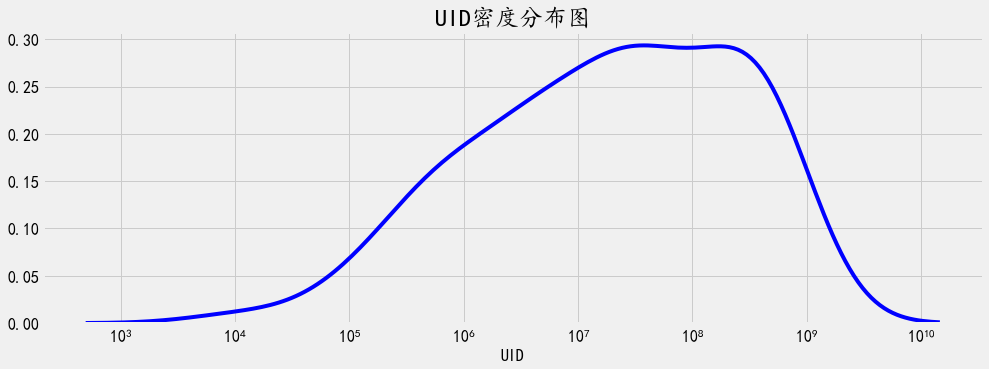

In [8]:
# 比较百大up主的 uid 分布，判断其加入的时间

plt.rcParams['figure.figsize'] = (15, 5)
a = sns.kdeplot(data['UID'], color = 'blue', log_scale=True)    #绘制直方图和内核密度曲线
plt.xlabel('UID', fontsize = 16)     #设置x轴标签
plt.xticks(fontsize=16)     #设置x轴刻度值字体大小
plt.yticks(fontsize=16)     #设置y轴刻度值字体大小
plt.title('UID密度分布图', fontsize = 24)    #设置图表标题内容和字号
a.set(ylabel=None)
plt.show()

#### 4.2 视频分区分布
B 站规定每个投稿视频都需指定它所在的分区，从而方便的为不同需求的观众提供不同的视频。而 UP主精力有限，通常也只会针对少数主题集中运营，只会对某一特定分区集中投稿。热度更高的分区，容易吸引更多的观众，因此会有更多 UP 主加入运营，产出更多高质量的视频，反过来吸引更多的观众。因此选择某个视频分区的 UP 主数量可以直接反映该分区的受关注程度，与 UP 主们的定位和创作内容息息相关，也是一项重要特征。我们对百大 UP 主的视频分区进行了统计，并绘制了一张饼图。

可以看到，游戏区作为 B 站传统核心运营方向，入选的 UP 主依然最多，达到了 19 位。但是另一个传统方向动画（8 位）则被生活（15 位）、美食（11 位）、知识（10 位）所超越。可以看出，游戏和动画作为 B站的“核心”之二，稳定的受众和较高的用户活跃度依然使其保持着 B 站基石的地位；而美食区和生活区作为泛娱乐化的内容，由于休闲性和娱乐性广受普罗大众喜爱，在 B 站主动转型的过程中也开始慢慢占据一席之地；知识区的多位 UP 主入选则说明用户不再仅限于纯粹娱乐，彰显着 B 站日益浓厚的文化氛围。至于动物圈、汽车、国创等小众视频内容的创作者较少，因此排在末位。

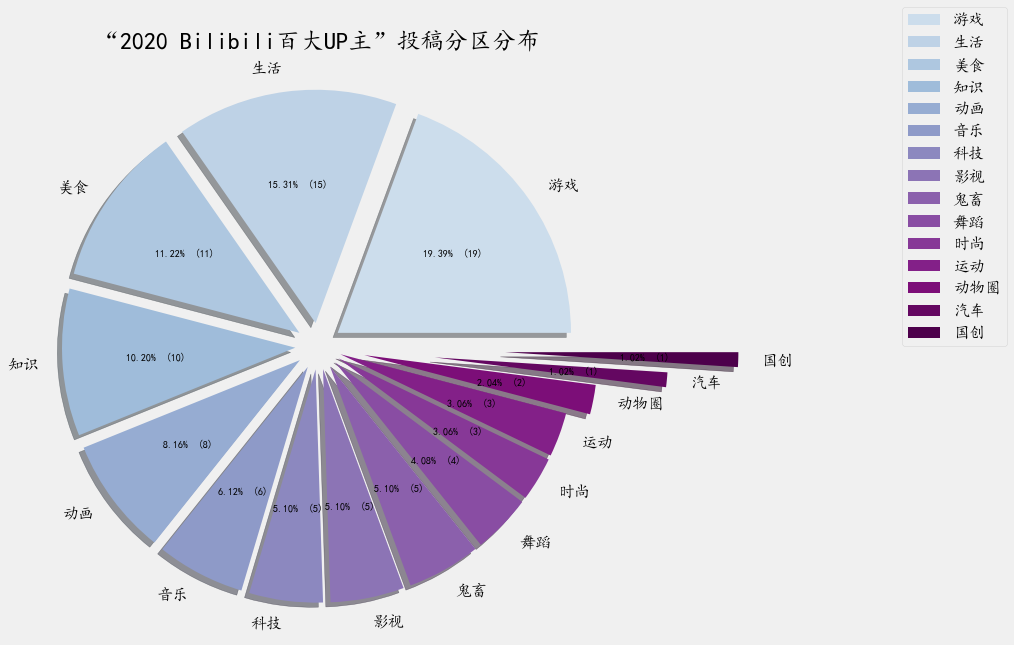

In [9]:
# 对百大UP主所在分区进行统计，并形成饼状图

labels = ['游戏','生活','美食','知识','动画','音乐','科技','影视','鬼畜','舞蹈','时尚','运动','动物圈','汽车','国创']   #根据统计结果依序设置标签
sizes = data['分区'].value_counts()     #添加数值为各分区入选UP主的个数
colors = plt.cm.BuPu(np.linspace(0.2, 1, 15))   #设置颜色，这里采用cm(即colormap，接受一个数值并输出一个指定的颜色的字典)生成渐变的颜色
explode = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.2, 0.5, 0.8]   #设置各label的explode值，实现饼图逐渐向外爆炸的效果

# 自定义函数获得需要在饼图上显示的具体数值和百分比
def make_autopct(sizes):
    def my_autopct(pct):
        total = sum(sizes)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct

plt.rcParams['figure.figsize'] = (10, 10)
patches, l_text, p_text = plt.pie(sizes, labels = labels, colors = colors, explode = explode, autopct=make_autopct(sizes), shadow = True)   #绘制饼图，并用l_text和p_text存下文本信息
plt.title('“2020 Bilibili百大UP主”投稿分区分布', fontsize = 24)     #设置图表标题内容和字号

# 遍历并设置文本信息的字号
for _ in l_text:
    _.set_size(16)
for __ in p_text:
    __.set_size(10)

plt.legend(loc = (1.5,0.5), fontsize = 16)     #显示图例并设置其位置
plt.show()

#### 4.3粉丝数量分布
粉丝数可以直观地显示一个 UP 主受欢迎程度，侧面反映出其视频内容的价值、影响和口碑。我们对百大 up 的粉丝数进行了统计并绘制了直方图和密度曲线以显示粉丝数分布。其中 x 轴显示粉丝数区间，y 轴显示 UP 主数量。直方图高度显示了该粉丝数区间 UP 主的数量，而 y 轴刻度值则对应于密度曲线的纵坐标。

根据图表，这 100 位 UP 主的粉丝数集中在 100~400w。另外，粉丝数最多的 UP 主的粉丝数超过了 2000w，远远将其他同行甩在后头。我们从数据集中提取该 UP主的信息，名为“罗翔说刑法”，分区为“知识”，UID为 517327498，从大到小排在第六，属于非常“年轻”的 UP 主。可以看出，如果能有足够优质的视频产出，即使是新晋 UP 主也可以在 B 站占据非常大的流量。

D:\virtualenv\test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


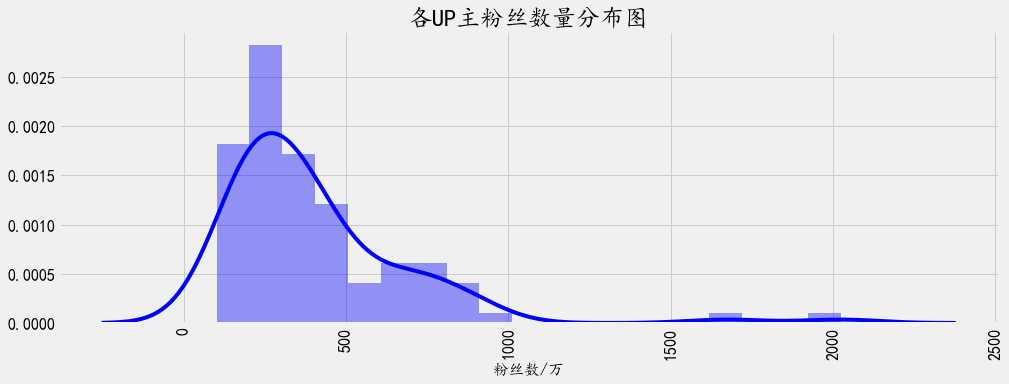

In [10]:
# 比较百大UP主的粉丝数，形成直方图和密度曲线

plt.rcParams['figure.figsize'] = (15, 5)
a = sns.distplot(data['粉丝数'], color = 'blue')    #绘制直方图和内核密度曲线
plt.xlabel('粉丝数/万', fontsize = 16)     #设置x轴标签
plt.xticks(fontsize=16, rotation = 90)     #设置x轴刻度值字体大小
plt.yticks(fontsize=16)     #设置y轴刻度值字体大小
plt.title('各UP主粉丝数量分布图', fontsize = 24)    #设置图表标题内容和字号
a.set(ylabel=None)
plt.show()

#### 4.4投稿数分布
视频投稿数显示了一个 UP 主的创作活力，也能侧面反映其影响力。我们对 100 位 UP 主的视频投稿数进行了统计，并绘制了直方图。

根据图表，可以看到 UP 主们的投稿数量基本集中在 150~300 个。其中投稿最多的 UP 主发布了超过1400 条视频，数量相当可观，显示了 B 站浓厚的创新氛围。

D:\virtualenv\test\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


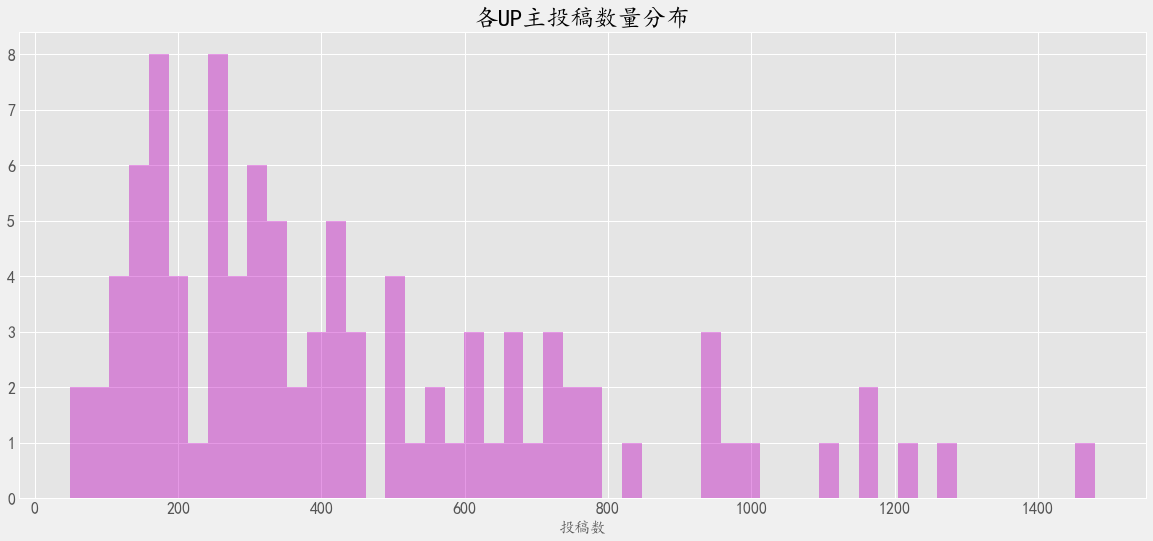

In [11]:
# 比较百大UP主的投稿数，形成条形图

x = data.投稿数
plt.figure(figsize = (18,8))
plt.style.use('ggplot')

a = sns.distplot(x, bins = 52, kde = False, color = 'm')    #绘制直方图
a.set_xlabel(xlabel = "投稿数", fontsize = 16)      #设置x轴标签
a.set_ylabel(ylabel = None)     #设置y轴标签
plt.xticks(fontsize=16)     #设置x轴刻度值字体大小
plt.yticks(fontsize=16)     #设置y轴刻度值字体大小
a.set_title(label = '各UP主投稿数量分布', fontsize = 24)    #设置图表标题内容和字号
plt.show()

#### 4.5 性别分布
我们对数据集中“性别”属性进行统计并绘制条形图。可以看到，其中男性有 73 位，占大多数；女性有 21 位，占少数；另外，还有 4 个账号由男女合作运营。

从此可以推断出 B 站的男性 UP 主偏多。我认为这可能与 B 站独特的视频内容有关——作为由 ACG社区发展而成的视频网站，B 站中游戏、动画区的内容创作者相对最多，而这类视频的创作者中往往男性偏多。

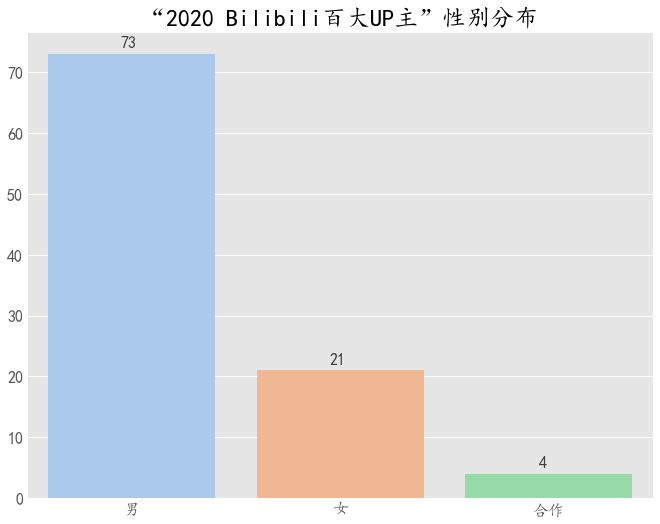

In [12]:
# 使用“countplot”函数，对百大UP主的性别进行计数并输出条形图

plt.figure(figsize = (10, 8))
a = sns.countplot(x = '性别', data = data, palette = 'pastel')  #countplot计数图，对不同性别进行计数，并显示为条形图
for _ in a.patches:     #在条形图上显示具体数值
    a.annotate(f'\n{_.get_height()}', (_.get_x() + 0.35, _.get_height() + 1), color = '#3F3F3F', size = 16)   #并设置数值显示的位置和其颜色、字号
plt.xticks(fontsize = 16)     #设置x轴标签值字体大小
plt.yticks(fontsize = 16)     #设置y轴刻度值字体大小
a.set_title(label = '“2020 Bilibili百大UP主”性别分布', fontsize = 24)   #设置图表标题内容和字号
a.set(xlabel = None, ylabel = None)
plt.show()

# 5. 多变量分析
仅从单个变量进行分析，许多时候只能得到一个过于泛化的结论。事实上，由于 B 站复杂又盘折的发展背景，单单是百大 UP 主的性别比例并不足以证明问题，仅用每个分区的 UP 主数量来说明该分区的活跃度也实在有些单薄。这些时候需要结合多变量进行分析才能得到可靠的结论。在这一节随后我们将对性别和视频分区两大话题进行更详细的分析。

#### 5.1 UP 主性别与粉丝数与分区的关系
性别是当今社会上一个敏感的话题，男女性是否在同一平台上得到相同的待遇，获得相同的发展支持，是许多人关注的焦点。B 站作为当今中国最大的弹幕视频网站，我们也应关注其是否对男女性 UP 主都提供了足够开阔的平台。在单变量分析中，我们观察到百大 UP 主名单中男性占据较多的名额，但这并不能直接简单粗暴的下结论。考虑到 B 站以 ACG 为基础发展的背景，本身就具有更多的男性用户，因此还需要从更复杂的二元关系中找寻线索。

我们选择了 UP 主性别与粉丝数的关系，以及 UP主所属的分区的关系，作为主要分析目标。粉丝数侧面反映 UP 主在视频创作市场中的竞争力，通常也意味着更大的话语权，是我们首先拿来衡量的指标。我们对不同性别 UP 主的粉丝数量进行了统计并绘制了条形图。此外，各个分区的 UP 主中是否性别比例均衡，是否存在某些分区中男性对女性（反之亦然）形成一个碾压的局势，也是一个值得考量的点。我们也对每个分区中不同性别 UP 主的数量绘制了一张直方图（合作 UP 主比较少，在此图中被简单省去）。

如下图所示，男性 UP 主的粉丝数量稍稍多于女性 UP 主，但没有拉开明显差距，由于这 100 位 UP 主中男性占大多数，所以并不能说粉丝数量和性别存在明显的关系。可以想到由于 B 站在 ACG 道路上的长
久发展中积累了大量以动漫、游戏为主要爱好的男性用户，而这类内容的创作者也是由男性占大多数，因此在 B 站男性 UP 主的粉丝数量居多也在情理之中。事实上，相对于上图（上个单元）中过于显著的男女比例差异，下图的“微小差异”反而体现了女性 UP 主在 B 站上的充分发展空间。

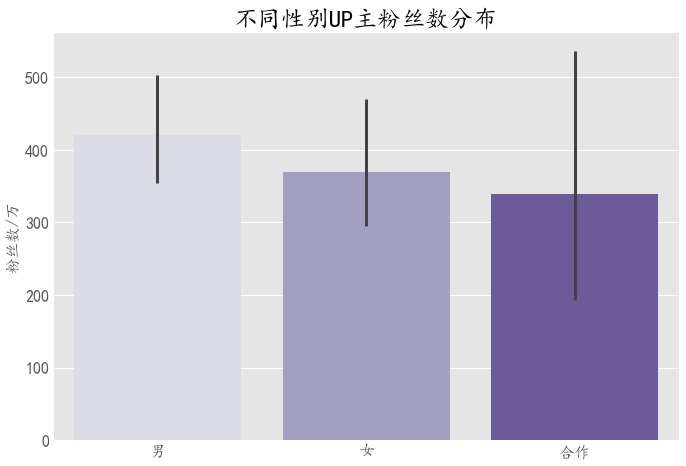

In [13]:
# 分析UP主性别与粉丝数的关系，形成条形图

plt.rcParams['figure.figsize'] = (10, 7)
a = sns.barplot(x = data['性别'], y = data['粉丝数'], palette = 'Purples', errwidth = 3)        #绘制条形图
plt.xticks(fontsize=16)     #设置x轴刻度值字体大小
plt.yticks(fontsize=16)     #设置y轴刻度值字体大小
plt.ylabel('粉丝数/万', fontsize = 16)     #设置y轴标签
a.set_title(label = '不同性别UP主粉丝数分布', fontsize = 24)    #设置图表标题内容和字号
a.set(xlabel = None)
plt.show()

此外，如下图所示，途中淡紫色柱表示男性 UP 主数量，深紫色柱表示女性 UP 主数量。可以明显看出，绝大部分分区中的性别数量分布还是很不均衡的，不仅限于游戏区和动画区两个传统 ACG 领域，生活区中也是男性数量远超女性。另一个值得注意的点是，女性 UP 主占据优势的分区，除了音乐舞蹈之外，还包括了运动分区。

经过观察可以发现这些运动分区的 UP 主视频内容均以减肥瑜伽为主，更受女性用户欢迎。相对的，也说明更可能吸引男性用户的健身增肌方向并不占据 B 站主流。这其实也与人们对 B 站大量“宅男”更喜好游戏动漫，渴望现充生活却并不想起来运动的刻板印象相符，这种“刻板印象”会在一定程度上成为 UP 主自由选择分区的阻碍。从积极的角度想，这也意味着存在巨大的潜在市场可以发掘。

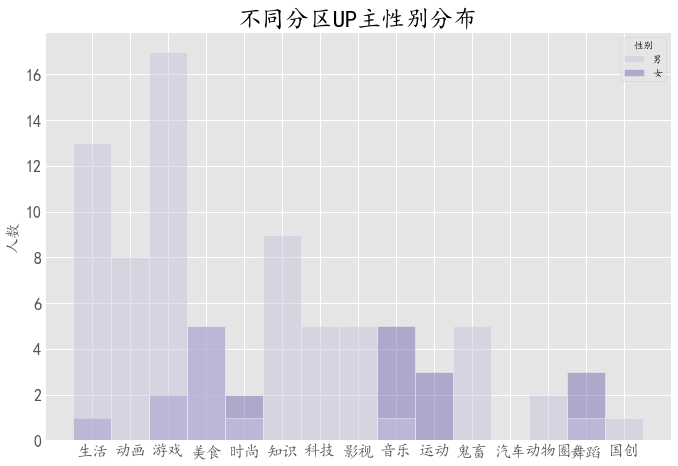

In [14]:
plt.rcParams['figure.figsize'] = (10, 7)

_data = data[data != '合作']

a = sns.histplot(data = _data, x='分区', hue='性别', palette = 'Purples')        #绘制条形图
plt.xticks(fontsize=16)     #设置x轴刻度值字体大小
plt.yticks(fontsize=16)     #设置y轴刻度值字体大小
plt.ylabel('人数', fontsize = 16)     #设置y轴标签
a.set_title(label = '不同分区UP主性别分布', fontsize = 24)    #设置图表标题内容和字号
a.set(xlabel = None)
plt.show()

#### 5.2 视频分区与粉丝数投稿数获赞数的关系
从视频分区的角度，我们也可以分析出更多的信息。正如上述图表所描述的，B 站不同分区的 up 主数量相差极大。这是从 B 站的特殊发展背景，不同类型视频在用户中受欢迎的程度，up 主发展资源需求等综
合条件影响下产生的结果。我们希望通过分析不同视频分区 up 主的粉丝数，投稿数，和获赞数，反映出各个分区内观众的人数以及活跃度，以及 up 主为了维持流量所需要的工作成本，从而可以估计每个分区是
否得到了充分的开发，还是已经都进入了“卷”的完成态。这对视频网站的持续建设与发展十分重要。

我们统计了不同分区 up 主的粉丝数，投稿数，获赞数，并分别绘制了两幅箱型图和一幅小提琴图。小提琴图结合了箱形图和密度图的特征，可以很好地显示数据的分布形状，有利于我们进行数据分析。

根据图表，我们发现了一个明显的异类：运动区的up 主平均粉丝数远远超过其他分区，但投稿数和获赞数却显得比较低迷。在如今的社会环境中，肥胖困扰着许多人，年轻世代也普遍注重自己的身材形象，因此运
动区头部 up 主也借此机会获得了大量的关注，这个可以理解。但是在庸碌的社会生活中又少有人能下定决心抽出宝贵的休息时间用来好好锻炼身体，许多时候这些运动区 UP 主也只是默默躺在关注列表里，以至
于他们发了新的教学视频也没有心情去打开学习。这些 UP 主也明了这个现状，专心服务那些在点赞的活跃的小部分粉丝，从而产生了一个看似“蛋糕（粉丝数量）巨大”的假象。从入选百大的 up 主数量来看，运动区仅 3 人，排在相当靠后的位置，这也能进一步验证上述猜想。

除了运动区外，另一个值得关注的分区是影视区。它的特点是投稿量有着很高的均值和很低的方差，意味着这个分区所有入选的 up 都相当高产。这也是可以理解的，如果想做一个影评视频，可能只需要拿到电影原片，配合符合时事的文案加以剪裁即可，其中拍摄成本被降得很低，对创意的需求也并不太高，天然提供了一个适合“卷”的平台，因此也就产生了大量投稿的现状。科技区其实也面临着相似的困境，不过由于可以往动手实践的方向上发展，因此一些少而精的 UP 主也还是能成为行业顶流。

此外，由于粉丝数，投稿数，获赞数都可以持续累积，与 UP 主入驻 B 站的时间长短息息相关，因此 UP 主数量较多，发展时间较久的分区，尤其是游戏区和动画区，由于 UP 主入驻的时间差异较大，投稿量的波动也较大。这一点在箱型图中也得到了很好的体现。

最后我们能注意到，生活区 UP 主获赞中位数最高，超过了 2500w；动画区和游戏区 UP 主中有的获得了超过 1 亿的点赞，是所有分区中最高的。可以看出，生活区视频以其轻松娱乐的内容广受喜爱；而作为 B 站的主体内容，动画和游戏区也是受欢迎的分区。但曾经作为 B 站代表的鬼畜区，粉丝数与投稿数都远不及其它分区，对比之下显得十分小众，获赞数却显得活跃，并不比其他分区差，表明这个分区依然保留着它的核心观众并未流失。

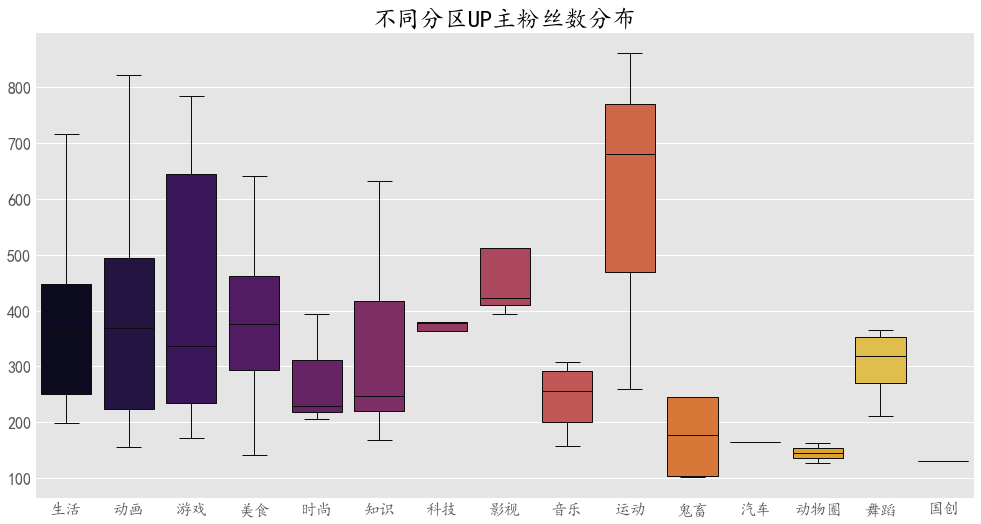

In [15]:
# 分析UP主分区与粉丝数的关系，形成箱形图

plt.rcParams['figure.figsize'] = (15, 8)
ax = sns.boxplot(data = data, x = '分区', y = '粉丝数', palette = 'inferno', linewidth=1, showfliers=False)      #绘制箱型图
ax.set(xlabel = None, ylabel = None)
plt.xticks(fontsize=16)     #设置x轴刻度值字体大小
plt.yticks(fontsize=16)     #设置y轴刻度值字体大小
ax.set_title(label = '不同分区UP主粉丝数分布', fontsize = 24)       #设置图表标题内容和字号
plt.show()

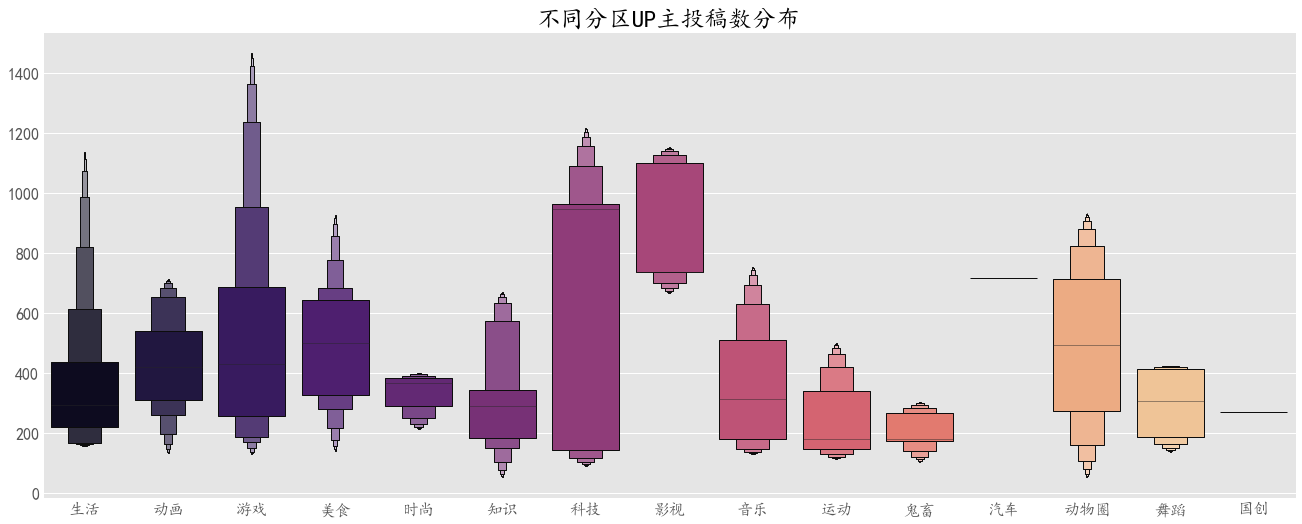

In [16]:
# 分析UP主分区与投稿数的关系，形成箱形图

plt.rcParams['figure.figsize'] = (20, 8)
a = sns.boxenplot(x = '分区', y = '投稿数', data = data, palette = 'magma', k_depth='proportion', linewidth=1, showfliers=False)      #绘制加强的箱型图
a.set_xlabel(xlabel = None)
a.set_ylabel(ylabel = None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
a.set_title(label = '不同分区UP主投稿数分布', fontsize = 24)
plt.show()

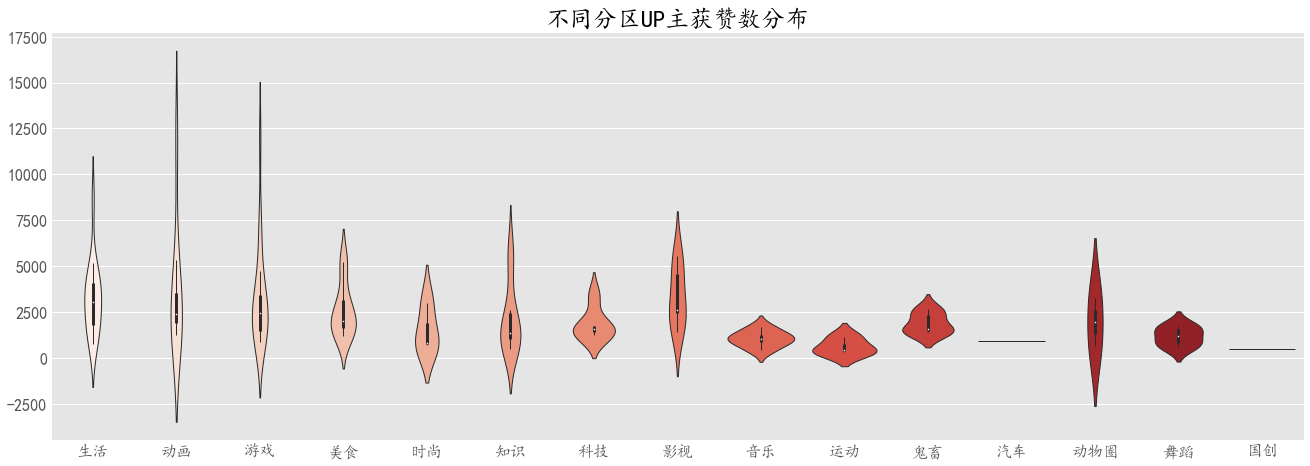

In [17]:
# 分析UP主分区与获赞数的关系，形成小提琴图

plt.rcParams['figure.figsize'] = (20, 7)
ax = sns.violinplot(x = data['分区'], y = data['获赞数'], palette = 'Reds', linewidth=1)    #绘制小提琴图
ax.set_xlabel(xlabel = None)
ax.set_ylabel(ylabel = None)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
ax.set_title(label = '不同分区UP主获赞数分布', fontsize = 24)
plt.show()

#### 5.3 百大 UP 主数据各属性的相关性
由于我们选取的数据都与百大 UP 主个人紧密相关，因此这些数据之间应当存在相关性 [6]。我们将文字特征映射为数字，然后绘制了一幅热力图来显示这些相关性。其中，热力值的绝对值大小反映了两个量的相关性。根据热力图，关系最紧密的三组量是“获赞数-粉丝数”、“粉丝数-播放数”、“获赞数-播放数”。

In [18]:
# 建立性别和分区映射
size_mapping = {
           '男': 0,
           '女': 1,
           '合作': 2,
           '游戏': 3,
           '生活': 4,
           '美食': 5,
           '知识': 6,
           '动画': 7,
           '音乐': 8,
           '科技': 9,
           '影视': 10,
           '鬼畜': 11,
           '舞蹈': 12,
           '时尚': 13,
           '运动': 14,
           '动物圈': 15,
           '汽车': 16,
           '国创': 17}
data['性别\''] = data['性别'].map(size_mapping)
data['分区\''] = data['分区'].map(size_mapping)

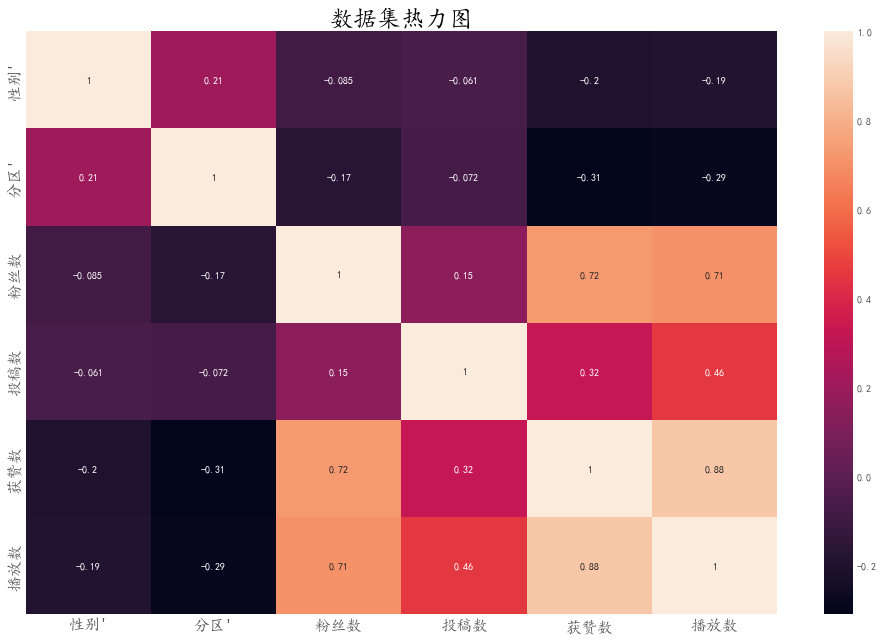

In [19]:
# 绘制热力图
plt.rcParams['figure.figsize'] = (15, 10)
sns.heatmap(data[['性别\'','分区\'','粉丝数','投稿数','获赞数','播放数']].corr(), annot = True)     #绘制热力图
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('数据集热力图', fontsize = 24)
plt.show()

#### 5.4 粉丝数、播放数和获赞数的关系
根据热力图，粉丝数、播放数和获赞数的关系密切，我们用折线图表示三者的关系。由于三者的值域相差甚远，为了更清楚地显示三者的关系，我们首先对三组数据进行归一化，然后用归一化的数量作为 y 轴绘制了如下折线图。

根据折线图，我们看到三组数据高度契合，这说明三者密切相关。也就是说，粉丝数高的 UP 主，视频播放数和获赞数也普遍较高，这很符合认知。

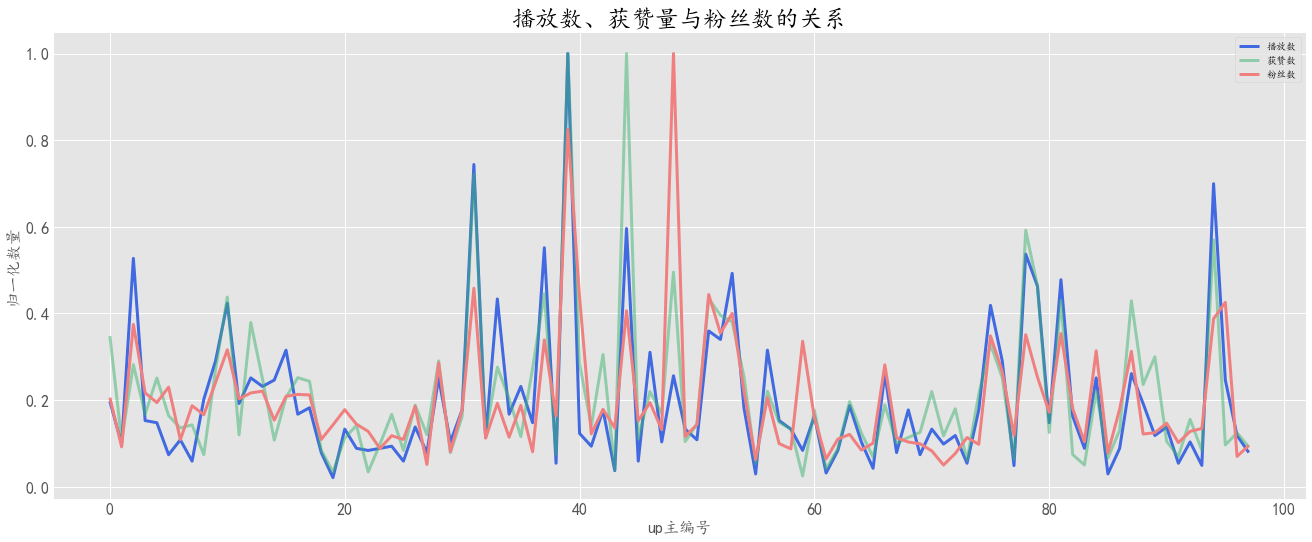

In [20]:
# 归一化
bofang_norm = data.播放数 / data.播放数.max()
huozan_norm = data.获赞数 / data.获赞数.max()
fensi_norm = data.粉丝数 / data.粉丝数.max()

# 根据热力图，粉丝数、播放数和获赞数的关系密切，用折线图表示三者的关系
plt.figure(figsize=(20,8))
plt.plot(bofang_norm,label ='播放数', alpha=1, color = 'royalblue', linewidth = 3)      #增加“播放数”曲线
plt.plot(huozan_norm, label = '获赞数',alpha=0.5, color = 'mediumseagreen', linewidth = 3)      #增加“获赞数”曲线
plt.plot(fensi_norm, label = '粉丝数',alpha=1, color = 'lightcoral', linewidth = 3)     #增加“粉丝数”曲线
plt.xlabel('up主编号', fontsize=16)
plt.ylabel('归一化数量', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('播放数、获赞量与粉丝数的关系', fontsize = 24)
plt.legend()
plt.show()

# 6. 总结
本文通过对互联网弹幕视频分享公司 bilibili 的顶流“百大 UP 主”数据进行数据分析，选择了适合的方法进行可视化展示。通过本文的分析，我们得出以下结论：

1. B 站近几年的商业化转型过程，逐渐将重心慢慢移动到更出圈的生活、知识、科技等新生分区上，投稿量众多，不再仅限于 ACG 相关的狭小领域，成功的扩大了受众。而类 ACG 视频内容依然最多且极受欢迎，基本盘依然稳固。
2. B 站 UP 主无论男女都能有足量的粉丝受众，都有着充足公平的发展空间。另一方面，不同分区的UP 主性别比例并不平衡，这也意味着可能存在新的机遇。
3. B 站的不同视频分区的发展状况相差较大，如运动区，影视区，游戏区，有着完全不同的发展模式，分区内依然存在着激烈的竞争。
   
总体来看，从得到的信息中可以发现，B 站作为当代年轻人的娱乐载体，整体的发展还是朝着健康积极的方向前进的。这次数据可视化工作也成功挖掘出了许多隐藏在数据深处的信息。

# 参考文献 
[1] Mohammad Ahsanullah, BM Golam Kibria, and Mohammad Shakil. Normal distribution. In Normal and Student st Distributions and Their Applications, pages 7–50. Springer, 2014. 

[2] Jerry L Hintze and Ray D Nelson. Violin plots: a box plot-density trace synergism. The American Statistician, 52(2):181–184, 1998. 

[3] MC Jones. Variable kernel density estimates and variable kernel density estimates. Australian Journal of Statistics, 32(3):361–371, 1990. 

[4] S Patro and Kishore Kumar Sahu. Normalization: A preprocessing stage. arXiv preprint arXiv:1503.06462, 2015. 

[5] David F Williamson, Robert A Parker, and Juliette S Kendrick. The box plot: a simple visual method to interpret data. Annals of internal medicine, 110(11):916–921, 1989. 

[6] Deirdre Wilson and Dan Sperber. Relevance theory, 2002. 